<a href="https://colab.research.google.com/github/pp1e/omnissiah/blob/main/%D0%94%D0%972_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Загрузка данных

In [71]:
train = pd.read_excel('content/train_DD.xlsx', sheet_name=0)
test = pd.read_csv('content/test.csv')

In [115]:
train_old = pd.read_csv('content/train.csv')

## 2. Анализ данных

In [116]:
train_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600560 entries, 0 to 600559
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          600560 non-null  int64  
 1   store_sales(in millions)    600560 non-null  float64
 2   unit_sales(in millions)     600560 non-null  int64  
 3   total_children              600560 non-null  int64  
 4   num_children_at_home        600560 non-null  int64  
 5   avg_cars_at home(approx),1  600560 non-null  int64  
 6   gross_weight                600560 non-null  float64
 7   recyclable_package          600560 non-null  int64  
 8   low_fat                     600560 non-null  int64  
 9   units_per_case              600560 non-null  int64  
 10  store_sqft                  600560 non-null  int64  
 11  coffee_bar                  600560 non-null  int64  
 12  video_store                 600560 non-null  int64  
 13  salad_bar     

In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240224 entries, 0 to 240223
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          240224 non-null  int64  
 1   store_sales(in millions)    240224 non-null  float64
 2   unit_sales(in millions)     240224 non-null  float64
 3   total_children              240224 non-null  float64
 4   num_children_at_home        240224 non-null  float64
 5   avg_cars_at home(approx).1  240224 non-null  float64
 6   gross_weight                240224 non-null  float64
 7   recyclable_package          240224 non-null  float64
 8   low_fat                     240224 non-null  float64
 9   units_per_case              240224 non-null  float64
 10  store_sqft                  240224 non-null  float64
 11  coffee_bar                  240224 non-null  float64
 12  video_store                 240224 non-null  float64
 13  salad_bar     

*Таблица 1 - Описание признаков исходного датасета*

|Признак|Описание|Тип данных|Категориальный|
|-------|--------|----------|--------------|
|`id`|Уникальный идентификатор для каждой записи|int64|Нет|
|`store_sales(in millions)`|Продажи в магазине в миллионах долларов| float64|Нет|
|`unit_sales(in millions)`|Объем продаж в миллионах единиц в магазине| float64|Да|
|`total_children`|Общее количество детей|float64| Да|
|`num_children_at_home`|Количество детей, проживающих дома, по данным, предоставленным клиентами|float64|Да|
|`avg_cars_at home(approx)`|Среднее количество автомобилей|float64|Да|
|`gross_weight`|Общий вес товара|float64|Нет|
|`recyclable_package`|Указывает, является ли упаковка товара перерабатываемой (0 или 1)|float64|Да|
|`low_fat`|Указывает, является ли продукт низкокалорийным (0 или 1)| float64|Да|
|`units_per_case`|Количество единиц в упаковке, доступных на полках магазина|float64|Нет|
|`store_sqft`|Площадь магазина в квадратных футах|float64|Нет|
|`coffee_bar`|Указывает, есть ли в магазине кофейня (0 или 1)|float64|Да|
|`video_store`|Указывает, есть ли в магазине видеомагазин или игровая зона (0 или 1)|float64|Да|
|`salad_bar`|Указывает, есть ли в магазине салат-бар (0 или 1)| float64| Да|
|`prepared_food`|Указывает, доступна ли в магазине готовая еда (0 или 1)| float64|Да|
|`florist`|Указывает, есть ли в магазине цветочный отдел (0 или 1)| float64|Да|
|`cost`|Стоимость привлечения клиента в долларах|float64|Нет|

**cost - целевая переменная (target)**

In [74]:
train.head(10)

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,"avg_cars_at home(approx),1",gross_weight,recyclable_package,low_fat,units_per_case,...,florist,cost,*train/test,*unit_price,*store_id,*campain_id,*product_id,*client_profile_id,*total_sales_in_mln,*total_sales_in_units
0,0,8.61,3,2,2,2,10.30,1,0,32,...,0,629.00,1,2.87,1,1.0,1,1,14.35,5
1,1,5.00,2,4,0,3,6.66,1,0,1,...,0,121.80,1,2.50,2,2.0,2,2,12.50,5
2,2,148.00,4,0,0,3,21.30,1,0,26,...,0,83.51,1,37.00,3,3.0,3,3,148.00,4
3,3,42.00,3,5,0,0,14.80,0,1,36,...,0,66.78,1,14.00,3,4.0,4,4,42.00,3
4,4,2.13,3,5,0,3,17.00,1,1,20,...,1,111.51,1,0.71,4,5.0,5,5,2.84,4
5,5,98.00,4,5,5,3,7.26,0,1,5,...,1,142.58,1,24.50,5,6.0,6,6,98.00,4
6,6,4.80,2,1,0,2,9.58,0,0,6,...,1,69.47,1,2.40,4,7.0,7,7,4.80,2
7,7,4.29,3,2,0,2,16.90,1,0,2,...,1,68.84,1,1.43,6,8.0,8,8,7.15,5
8,8,8.55,3,5,0,2,13.80,1,0,6,...,0,877.00,1,2.85,7,9.0,9,9,14.25,5
9,9,38.00,4,1,0,3,15.70,1,1,9,...,1,80.29,1,9.50,4,10.0,10,10,38.00,4


In [ ]:
train.describe()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,180167.500000,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,104020.187637,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.000000,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,90083.750000,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,180167.500000,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,270251.250000,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,360335.000000,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [ ]:
print(train.shape)
print(test.shape)

(360336, 17)
(240224, 16)


# 3. Выявление пропусков

In [111]:
missing_values = train.isna().sum()

missing_values

,0
id,0
store_sales(in millions),0
unit_sales(in millions),0
total_children,0
num_children_at_home,0
"avg_cars_at home(approx),1",0
gross_weight,0
recyclable_package,0
low_fat,0
units_per_case,0


# 4. Выявление категориальных признаков

In [ ]:
print(train.nunique())

id                            360336
store_sales(in millions)        1044
unit_sales(in millions)            6
total_children                     6
num_children_at_home               6
avg_cars_at home(approx).1         5
gross_weight                     384
recyclable_package                 2
low_fat                            2
units_per_case                    36
store_sqft                        20
coffee_bar                         2
video_store                        2
salad_bar                          2
prepared_food                      2
florist                            2
cost                             328
dtype: int64


In [ ]:
num_uniq: int = 6
for column_name in train.columns:
    if (train[column_name].nunique() <= num_uniq):
        print(column_name)

unit_sales(in millions)
total_children
num_children_at_home
avg_cars_at home(approx).1
recyclable_package
low_fat
coffee_bar
video_store
salad_bar
prepared_food
florist


# 4. Нормировка данных, создание и отбор признаков

In [119]:
# *unit_price = store_sales(in millions) / unit_sales(in millions)
train_old['unit_price'] = train_old['store_sales(in millions)'] / train_old['unit_sales(in millions)']

# *store_id = нумерация уникальных store_sqft
train_old['store_id'] = pd.factorize(train_old['store_sqft'])[0] + 1

# *product_id = нумерация уникальных gross_weight&"_"&recyclable_package&low_fat&units_per_case
train_old['product_id'] = pd.factorize(
    train_old['gross_weight'].astype(str) + "_" +
    train_old['recyclable_package'].astype(str) + "_" +
    train_old['low_fat'].astype(str) + "_" +
    train_old['units_per_case'].astype(str))[0] + 1

# *campain_id = нумерация уникальных cost
train_old['campain_id'] = pd.factorize(train_old['cost'])[0] + 1

# *client_profile_id = нумерация уникальных *store_id&"_"&total_children&num_children_at_home&avg_cars_at home(approx),1
train_old['client_profile_id'] = pd.factorize(
    train_old['store_id'].astype(str) + "_" +
    train_old['total_children'].astype(str) + "_" +
    train_old['num_children_at_home'].astype(str) + "_" +
    train_old['avg_cars_at home(approx).1'].astype(str))[0] + 1

# *total_sales_in_mln = max для store_sales(in millions) с группировкой по *product_id
total_sales_in_mln = train_old.groupby('product_id')['store_sales(in millions)'].transform('max')
train_old['total_sales_in_mln'] = total_sales_in_mln

# *total_sales_in_units = max для unit_sales(in millions) с группировкой по *product_id
total_sales_in_units = train_old.groupby('product_id')['unit_sales(in millions)'].transform('max')
train_old['total_sales_in_units'] = total_sales_in_units

train_old.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,...,prepared_food,florist,cost,unit_price,store_id,product_id,campain_id,client_profile_id,total_sales_in_mln,total_sales_in_units
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,...,0.0,0.0,62.09,2.87,1,1,1,1,14.35,5.0
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,...,0.0,0.0,121.80,2.50,2,2,2,2,16.00,5.0
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,...,0.0,0.0,83.51,3.52,3,3,3,3,17.60,5.0
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,...,0.0,0.0,66.78,1.34,3,4,4,4,7.92,5.0
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,...,1.0,1.0,111.51,0.71,4,5,5,5,10.14,4.0


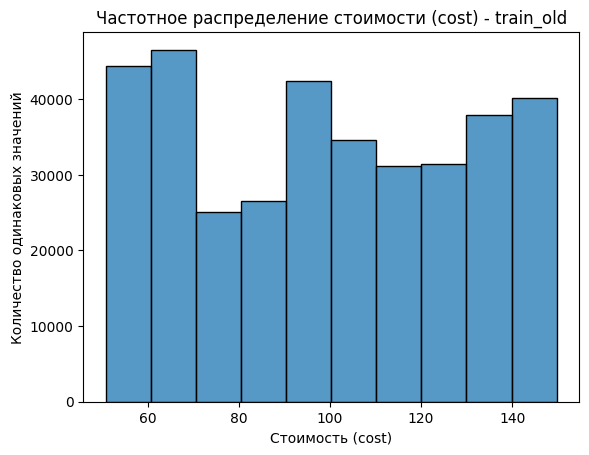

In [128]:
sns.histplot(train_old['cost'], kde=False, bins=10)

plt.title('Частотное распределение стоимости (cost) - train_old')
plt.xlabel('Стоимость (cost)')
plt.ylabel('Количество одинаковых значений')

plt.show()

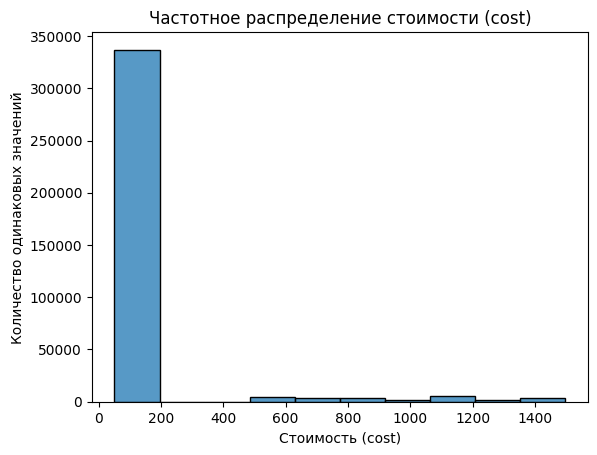

In [75]:
sns.histplot(train['cost'], kde=False, bins=10)

plt.title('Частотное распределение стоимости (cost)')
plt.xlabel('Стоимость (cost)')
plt.ylabel('Количество одинаковых значений')

plt.show()

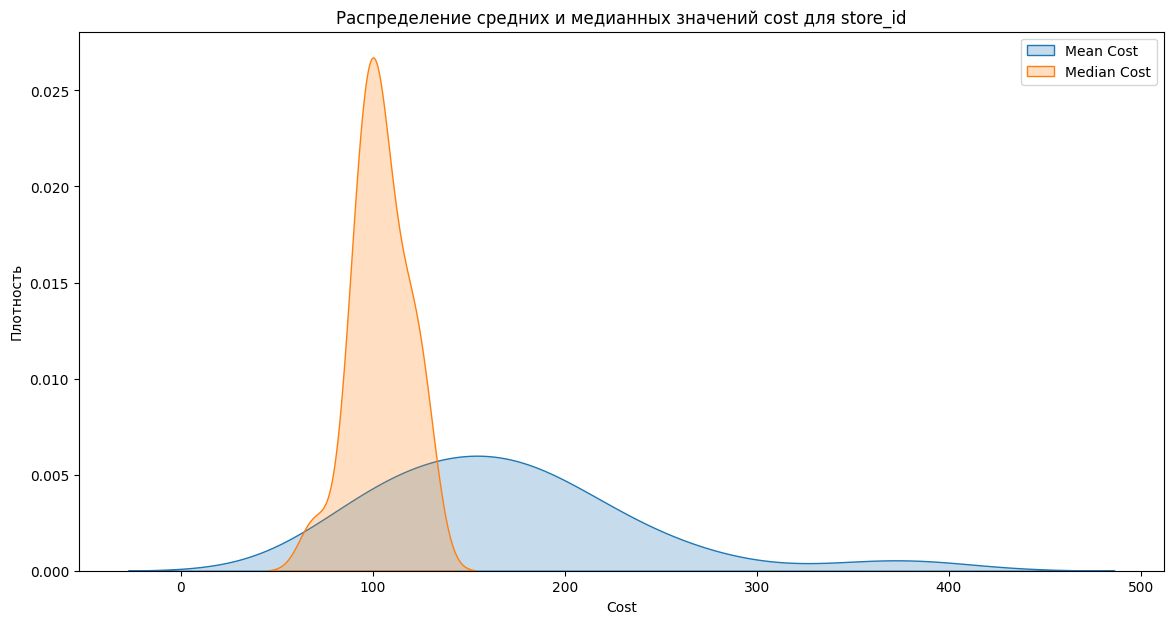

In [132]:
store_mean_cost = train.groupby('*store_id')['cost'].mean()
store_median_cost = train.groupby('*store_id')['cost'].median()

plt.figure(figsize=(14, 7))
sns.kdeplot(store_mean_cost, label='Mean Cost', fill=True)
sns.kdeplot(store_median_cost, label='Median Cost', fill=True)
plt.xlabel('Cost')
plt.ylabel('Плотность')
plt.title('Распределение средних и медианных значений cost для store_id')
plt.legend()
plt.show()

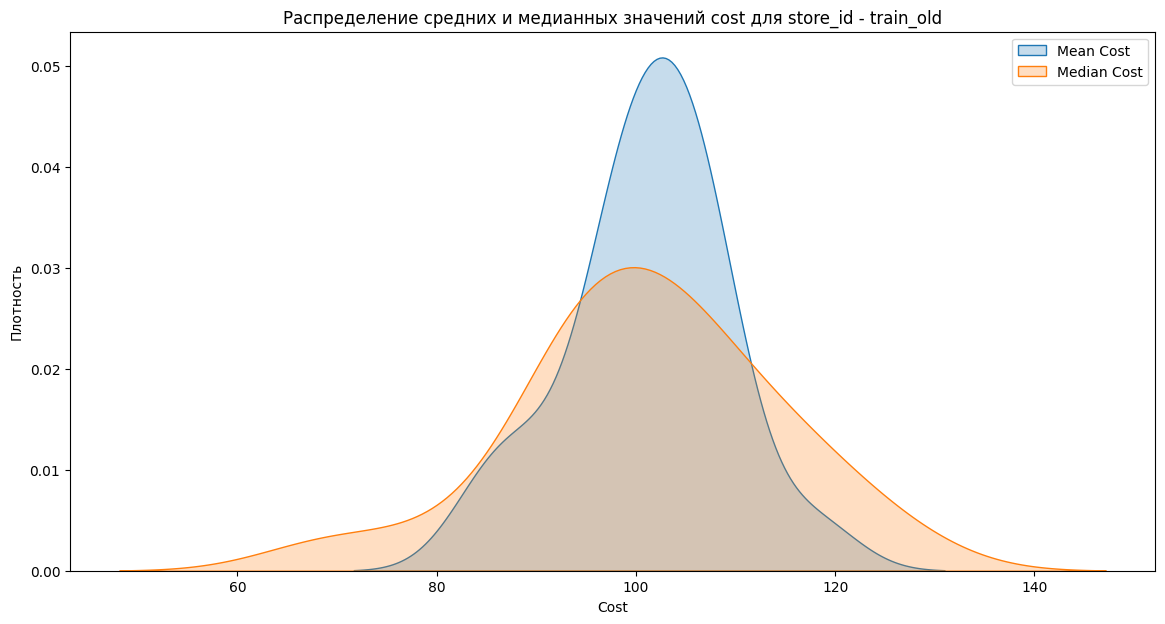

In [130]:
store_mean_cost = train_old.groupby('store_id')['cost'].mean()
store_median_cost = train_old.groupby('store_id')['cost'].median()

plt.figure(figsize=(14, 7))
sns.kdeplot(store_mean_cost, label='Mean Cost', fill=True)
sns.kdeplot(store_median_cost, label='Median Cost', fill=True)
plt.xlabel('Cost')
plt.ylabel('Плотность')
plt.title('Распределение средних и медианных значений cost для store_id - train_old')
plt.legend()
plt.show()

In [80]:
# Дисперсии для средних и медианных значений cost для store_id
store_mean_variance = np.var(store_mean_cost)
store_median_variance = np.var(store_median_cost)
print(store_mean_variance)
print(store_median_variance)

4388.699990793175
196.87097274999996


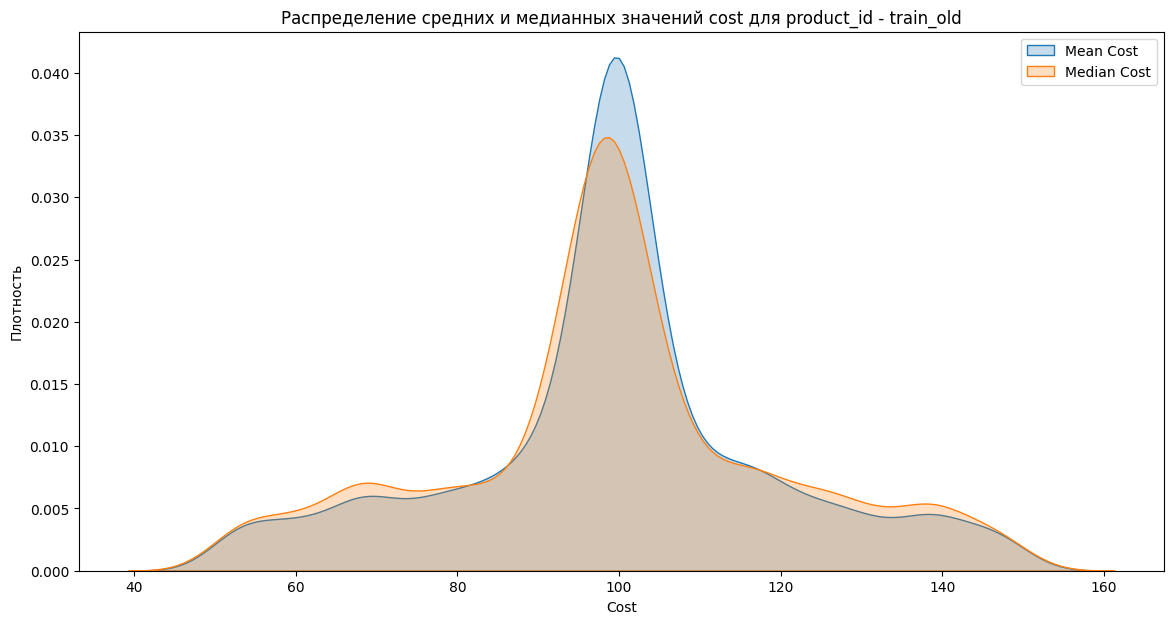

In [133]:
# Распределение средних и медианных значений cost для product_id
product_mean_cost = train_old.groupby('product_id')['cost'].mean()
product_median_cost = train_old.groupby('product_id')['cost'].median()

plt.figure(figsize=(14, 7))
sns.kdeplot(product_mean_cost, label='Mean Cost', fill=True)
sns.kdeplot(product_median_cost, label='Median Cost', fill=True)
plt.xlabel('Cost')
plt.ylabel('Плотность')
plt.title('Распределение средних и медианных значений cost для product_id - train_old')
plt.legend()
plt.show()

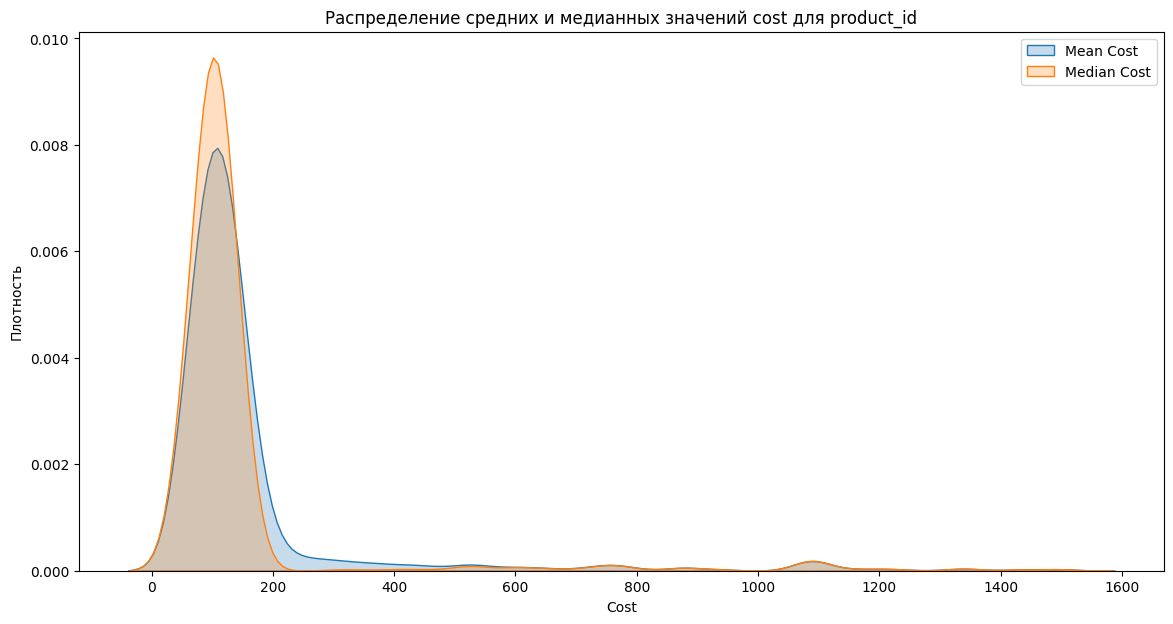

In [78]:
# Распределение средних и медианных значений cost для product_id
product_mean_cost = train.groupby('*product_id')['cost'].mean()
product_median_cost = train.groupby('*product_id')['cost'].median()

plt.figure(figsize=(14, 7))
sns.kdeplot(product_mean_cost, label='Mean Cost', fill=True)
sns.kdeplot(product_median_cost, label='Median Cost', fill=True)
plt.xlabel('Cost')
plt.ylabel('Плотность')
plt.title('Распределение средних и медианных значений cost для product_id')
plt.legend()
plt.show()

In [79]:
# Дисперсии для средних и медианных значений cost для product_id
product_mean_variance = np.var(product_mean_cost)
product_median_variance = np.var(product_median_cost)
print(product_mean_variance)
print(product_median_variance)

41243.928052127136
40193.95254754039


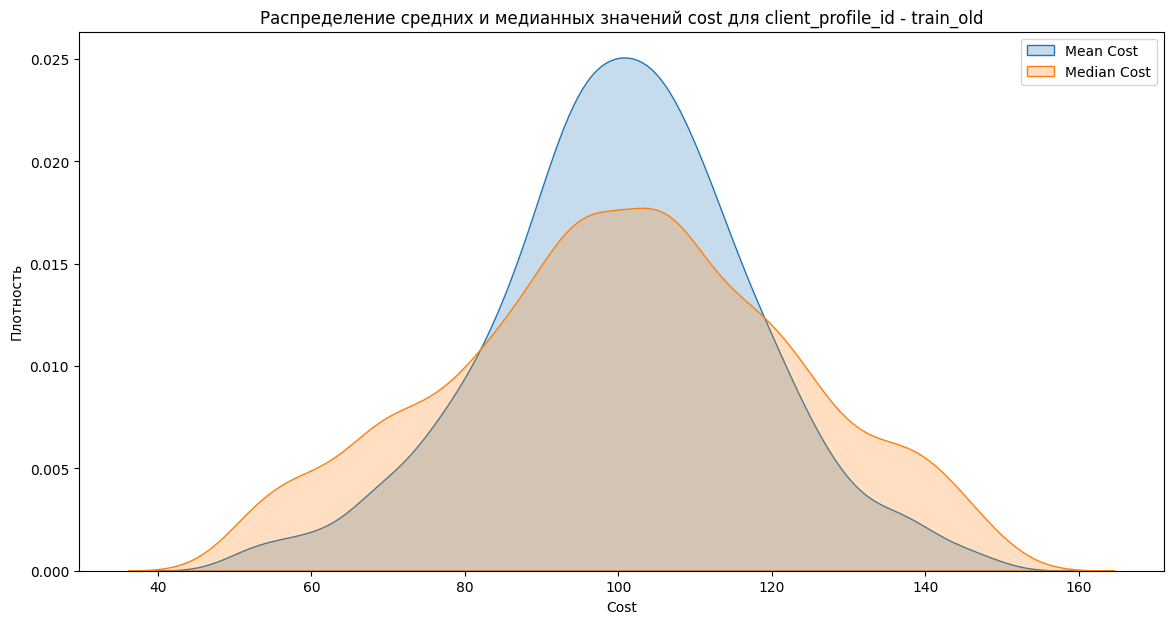

In [134]:
# Распределение средних и медианных значений cost для client_profile_id
client_mean_cost = train_old.groupby('client_profile_id')['cost'].mean()
client_median_cost = train_old.groupby('client_profile_id')['cost'].median()

plt.figure(figsize=(14, 7))
sns.kdeplot(client_mean_cost, label='Mean Cost', fill=True)
sns.kdeplot(client_median_cost, label='Median Cost', fill=True)
plt.xlabel('Cost')
plt.ylabel('Плотность')
plt.title('Распределение средних и медианных значений cost для client_profile_id - train_old')
plt.legend()
plt.show()

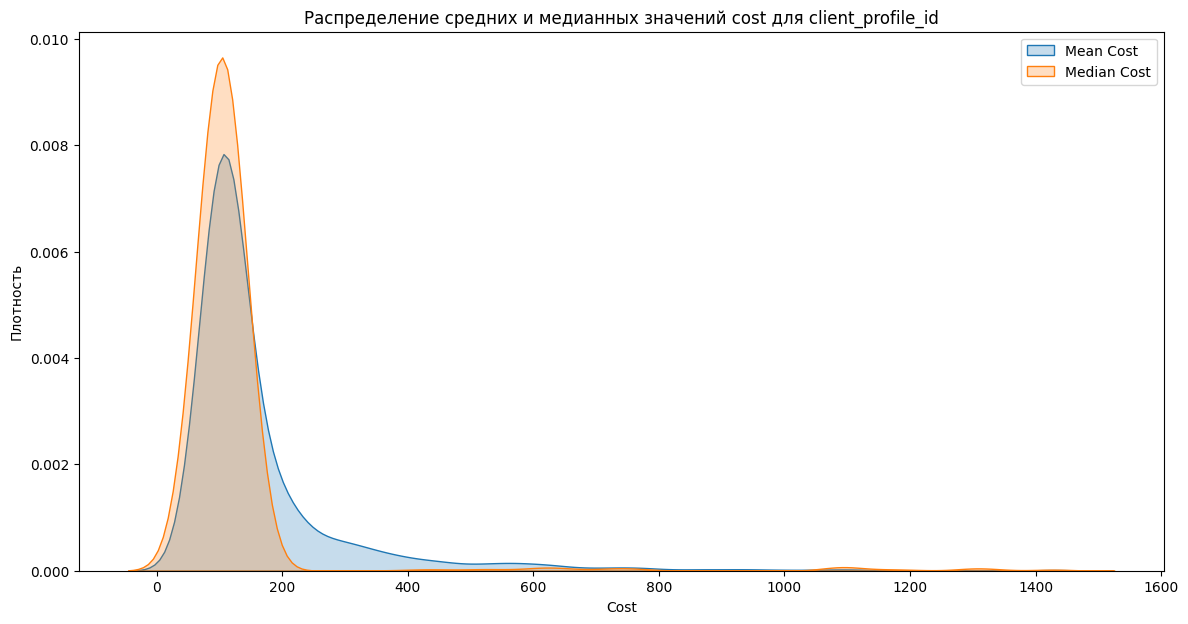

In [81]:
# Распределение средних и медианных значений cost для client_profile_id
client_mean_cost = train.groupby('*client_profile_id')['cost'].mean()
client_median_cost = train.groupby('*client_profile_id')['cost'].median()

plt.figure(figsize=(14, 7))
sns.kdeplot(client_mean_cost, label='Mean Cost', fill=True)
sns.kdeplot(client_median_cost, label='Median Cost', fill=True)
plt.xlabel('Cost')
plt.ylabel('Плотность')
plt.title('Распределение средних и медианных значений cost для client_profile_id')
plt.legend()
plt.show()

In [82]:
# Дисперсии для средних и медианных значений cost для client_profile_id
client_mean_variance = np.var(client_mean_cost)
client_median_variance = np.var(client_median_cost)
print(client_mean_variance)
print(client_median_variance)

20025.65686599837
21057.1315820933


In [125]:
distribution = train['coffee_bar'].value_counts()

distribution

,count
coffee_bar,
1,339060
0,261500


In [126]:
distribution = train_old['coffee_bar'].value_counts()

distribution

,count
coffee_bar,
1.0,203532
0.0,156804


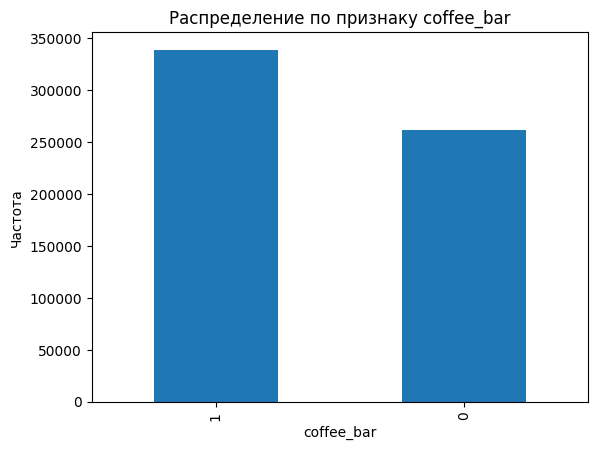

In [84]:
train['coffee_bar'].value_counts().plot(kind='bar')
plt.title('Распределение по признаку coffee_bar')
plt.xlabel('coffee_bar')
plt.ylabel('Частота')
plt.show()

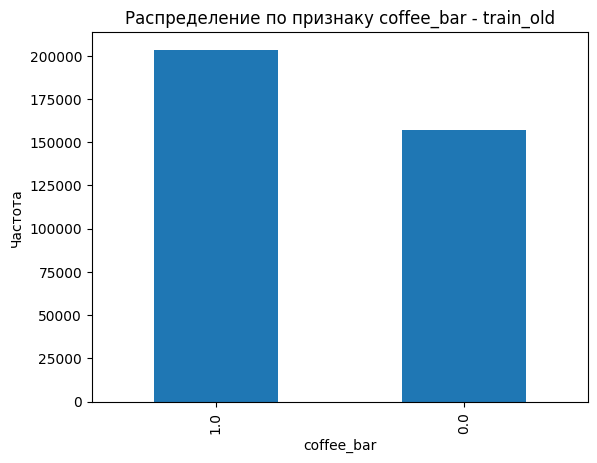

In [135]:
train_old['coffee_bar'].value_counts().plot(kind='bar')
plt.title('Распределение по признаку coffee_bar - train_old')
plt.xlabel('coffee_bar')
plt.ylabel('Частота')
plt.show()

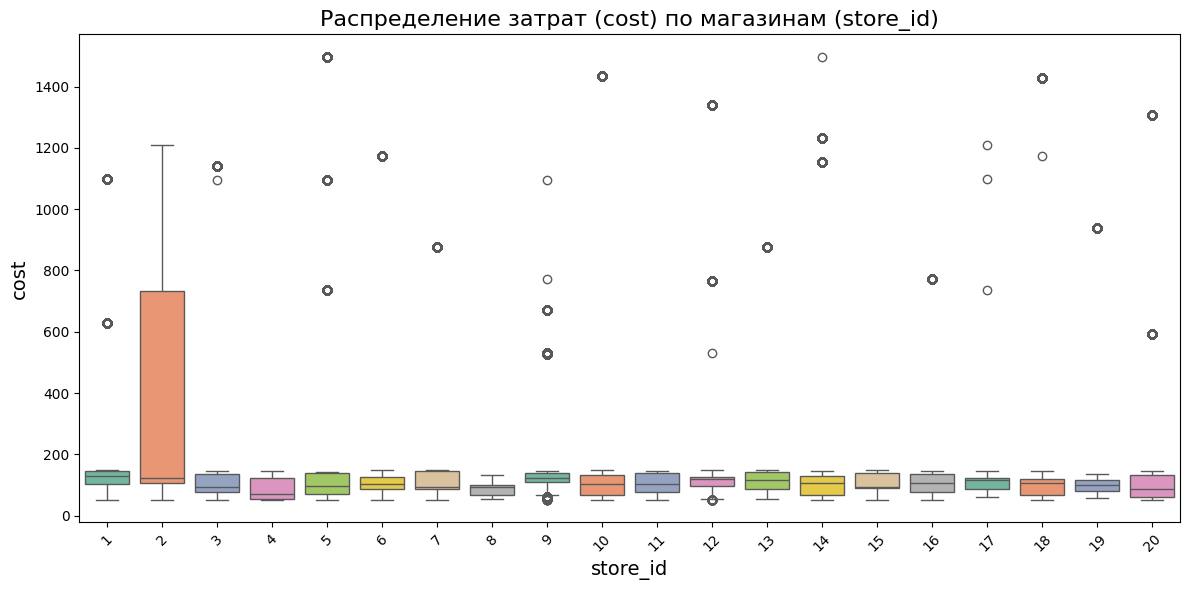

In [108]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='*store_id', y='cost', hue='*store_id', palette='Set2', legend=False)
plt.title('Распределение затрат (cost) по магазинам (store_id)', fontsize=16)
plt.xlabel('store_id', fontsize=14)
plt.ylabel('cost', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()